#### FOUNDATIONS OF MACHINE LEARNING: UNSUPERVISED LEARNING

<br>

# Handwriting Recognition Using K-Means


In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

<hr>

### Getting Started with Digits Dataset:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [7]:
print(digits.target)

[0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

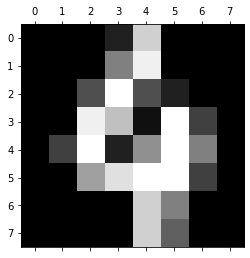

In [8]:
plt.gray()
plt.matshow(digits.images[100]) #this is at index 100
plt.show()

The image looks like a 4, so to see if it really is, we can print out the target at index 100.

In [9]:
print(digits.target[100])

4


Here's 64 samples images:

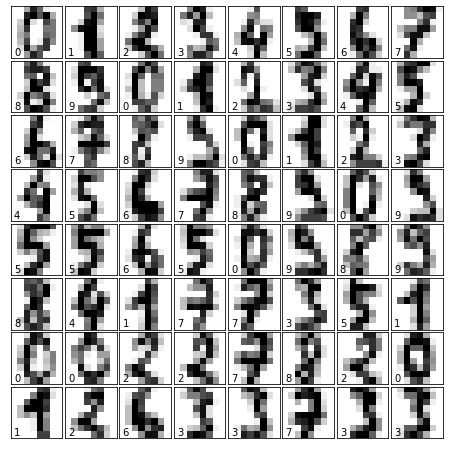

In [11]:
fig = plt.figure(figsize = (6, 6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    ax.text(0, 7, str(digits.target[i]))
plt.show()

### K-Means Clustering:

In [12]:
from sklearn.cluster import KMeans

Since the numbers go from 0 - 9, the number of clusters will be 10.

In [14]:
k = 10

model = KMeans(n_clusters = k, random_state = 42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

### Visualizing After K-Means:

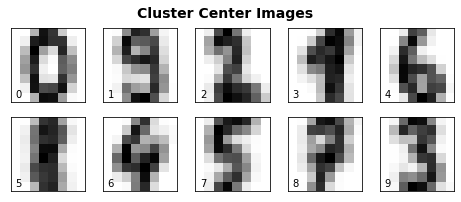

In [19]:
fig = plt.figure(figsize = (8, 3))
fig.suptitle('Cluster Center Images', fontsize = 14, fontweight = 'bold')

for i in range(k):
    ax = fig.add_subplot(2, 5, 1 + i, xticks = [], yticks = []) #gives the subplot a 2x5 grid at i+1th position
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap = plt.cm.binary) #displays images 
    ax.text(0, 7, str(i))
plt.show()

As we can see:
- Index `0` looks like 0
- Index `1` looks like 9
- Index `2` looks like 2
- Index `3` looks like 1
- Index `4` looks like 6
- Index `5` looks like 8
- Index `6` looks like 4
- Index `7` looks like 5
- Index `8` looks like 7
- Index `9` looks like 3

(The 1 and 8, as well as the 1 and 4 centroids look very similar to each other)

### Testing Your Model:

In [29]:
#The data is from my handwriting using the numbers 6825

new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.16,1.44,0.00,0.00,0.00,0.00,0.00,0.00,4.77,3.14,0.00,0.00,0.00,0.00,0.00,0.00,6.13,1.09,0.00,0.00,0.00,0.00,0.00,0.00,6.14,4.09,4.09,3.96,1.23,0.00,0.00,0.00,3.96,6.82,5.12,5.93,4.02,0.00,0.00,0.00,0.07,3.07,5.11,5.12,1.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.84,6.82,6.82,6.07,0.34,0.00,0.00,0.00,1.16,6.41,3.14,6.48,2.05,0.00,0.00,0.00,0.00,2.87,6.81,4.98,0.00,0.00,0.00,0.00,0.00,3.82,4.63,5.93,3.34,0.00,0.00,0.00,0.00,3.41,6.21,5.93,4.71,0.00,0.00,0.00,0.00,0.00,1.23,1.36,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.50,4.16,4.77,1.64,0.00,0.00,0.00,2.32,6.41,3.82,4.57,3.41,0.00,0.00,0.00,1.16,1.84,0.00,4.57,3.27,0.00,0.00,0.00,0.00,0.00,3.55,6.14,0.68,0.00,0.00,0.00,0.00,2.32,6.81,6.06,5.45,5.45,3.07,0.00,0.00,0.34,1.36,1.36,1.36,1.36,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.18,4.77,4.77,3.95,1.50,0.00,0.00,0.00,3.75,4.37,2.66,3.34,2.25,0.00,0.00,0.00,4.30,3.55,1.70,2.04,1.36,0.00,0.00,0.00,4.57,6.20,5.45,4.97,6.55,1.37,0.00,0.00,0.00,1.71,3.48,4.30,6.34,2.66,0.00,0.00,0.00,2.66,3.75,2.93,2.12,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
])

In [30]:
new_labels = model.predict(new_samples)
print(new_labels)

[3 3 6 6]


In [31]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

1144

No, the model didn't recognize my handwriting.

<br>

*Note: This model is trained on handwritten digits of 30 Turkish people from the 1990's.*